In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from feature_engineering import create_lag, create_rolling_avg, create_moving_avg_centered

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = {
    "Date":{
        "0":"2022-01-01T00:00:00.000","1":"2022-01-02T00:00:00.000","2":"2022-01-03T00:00:00.000","3":"2022-01-04T00:00:00.000","4":"2022-01-05T00:00:00.000","5":"2022-01-06T00:00:00.000","6":"2022-01-07T00:00:00.000","7":"2022-01-08T00:00:00.000","8":"2022-01-09T00:00:00.000","9":"2022-01-10T00:00:00.000","10":"2022-01-11T00:00:00.000","11":"2022-01-12T00:00:00.000","12":"2022-01-13T00:00:00.000","13":"2022-01-14T00:00:00.000","14":"2022-01-15T00:00:00.000","15":"2022-01-16T00:00:00.000","16":"2022-01-17T00:00:00.000","17":"2022-01-18T00:00:00.000","18":"2022-01-19T00:00:00.000","19":"2022-01-20T00:00:00.000","20":"2022-01-21T00:00:00.000","21":"2022-01-22T00:00:00.000","22":"2022-01-23T00:00:00.000","23":"2022-01-24T00:00:00.000","24":"2022-01-25T00:00:00.000","25":"2022-01-26T00:00:00.000","26":"2022-01-27T00:00:00.000","27":"2022-01-28T00:00:00.000","28":"2022-01-29T00:00:00.000","29":"2022-01-30T00:00:00.000","30":"2022-01-31T00:00:00.000","31":"2022-02-01T00:00:00.000","32":"2022-02-02T00:00:00.000","33":"2022-02-03T00:00:00.000","34":"2022-02-04T00:00:00.000","35":"2022-02-05T00:00:00.000","36":"2022-02-06T00:00:00.000","37":"2022-02-07T00:00:00.000","38":"2022-02-08T00:00:00.000","39":"2022-02-09T00:00:00.000","40":"2022-02-10T00:00:00.000","41":"2022-02-11T00:00:00.000","42":"2022-02-12T00:00:00.000","43":"2022-02-13T00:00:00.000","44":"2022-02-14T00:00:00.000","45":"2022-02-15T00:00:00.000","46":"2022-02-16T00:00:00.000","47":"2022-02-17T00:00:00.000","48":"2022-02-18T00:00:00.000","49":"2022-02-19T00:00:00.000","50":"2022-02-20T00:00:00.000","51":"2022-02-21T00:00:00.000","52":"2022-02-22T00:00:00.000","53":"2022-02-23T00:00:00.000","54":"2022-02-24T00:00:00.000","55":"2022-02-25T00:00:00.000","56":"2022-02-26T00:00:00.000","57":"2022-02-27T00:00:00.000","58":"2022-02-28T00:00:00.000"
    },
    "Consumption":{
        "0":65.462,"1":268.45,"2":236.566,"3":222.02,"4":380.63,"5":400.964,"6":388.762,"7":65.244,"8":146.85,"9":218.74,"10":317.21,"11":137.916,"12":156.492,"13":66.572,"14":64.738,"15":66.618,"16":104.12,"17":356.146,"18":287.586,"19":258.736,"20":274.366,"21":66.314,"22":369.348,"23":314.456,"24":344.608,"25":20.532,"26":210.738,"27":240.878,"28":64.234,"29":209.498,"30":189.51,"31":68.708,"32":67.944,"33":66.418,"34":70.006,"35":65.808,"36":114.17,"37":66.678,"38":214.302,"39":67.712,"40":218.172,"41":190.336,"42":66.264,"43":187.376,"44":218.346,"45":211.714,"46":166.972,"47":197.51,"48":203.442,"49":68.232,"50":146.404,"51":149.144,"52":207.428,"53":124.748,"54":101.98,"55":93.772,"56":47.98,"57":46.224,"58":68.024
    }
}
 
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Consumption
0,2022-01-01,65.462
1,2022-01-02,268.450
2,2022-01-03,236.566
3,2022-01-04,222.020
4,2022-01-05,380.630


In [3]:
df['Lag 7'] = create_lag(df, lag=7)
df['rolling_avg'] = create_rolling_avg(df)
df['moving_avg_centered'] = create_moving_avg_centered(df, window=3, center=True)

In [4]:
df.head(10)

,Date,Consumption,Lag 7,rolling_avg,moving_avg_centered
0,2022-01-01,65.462,NaN,65.462000,NaN
1,2022-01-02,268.450,NaN,166.956000,190.159333
2,2022-01-03,236.566,NaN,190.159333,242.345333
3,2022-01-04,222.020,NaN,198.124500,279.738667
4,2022-01-05,380.630,NaN,234.625600,334.538000
5,2022-01-06,400.964,NaN,262.348667,390.118667
6,2022-01-07,388.762,NaN,280.407714,284.990000
7,2022-01-08,65.244,65.462,253.512250,200.285333
8,2022-01-09,146.850,268.450,241.660889,143.611333
9,2022-01-10,218.740,236.566,239.368800,227.600000


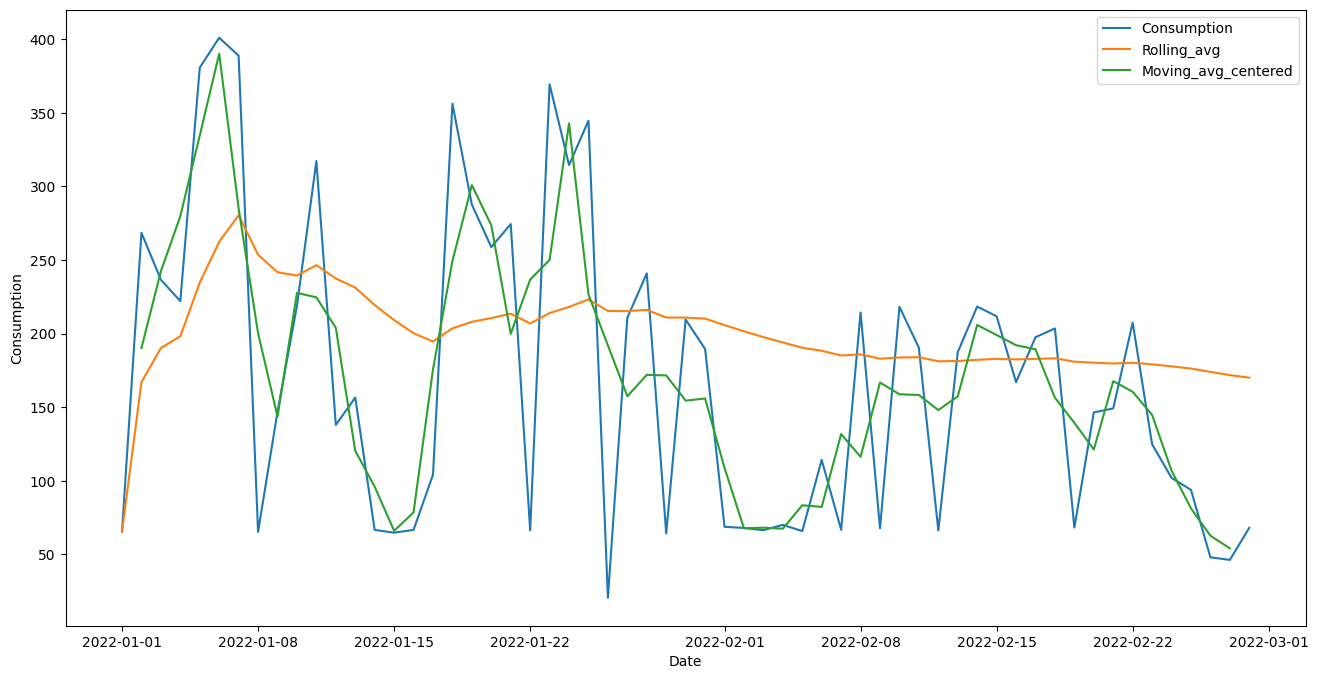

In [5]:
plt.figure(figsize=(16,8))

sns.lineplot(data=df, x='Date', y="Consumption", label='Consumption')
sns.lineplot(data=df, x='Date', y="rolling_avg", label='Rolling_avg')
sns.lineplot(data=df, x='Date', y="moving_avg_centered", label='Moving_avg_centered')

plt.show()

In [6]:
from model_training import train_linear_regression, train_ARIMA
from evaluation import eval_LR_model, eval_arima_model

In [ ]:
model_LR, X_test, y_test = train_linear_regression(df)
mse_LR = eval_LR_model(X_test, y_test, model_LR)
mse_LR

10842.63154170134

In [8]:
model_ARIMA, test = train_ARIMA(df)

d:\Wipro\venv-3.10.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Wipro\venv-3.10.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Wipro\venv-3.10.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
mse_ARIMA = eval_arima_model(test, model_ARIMA)
mse_ARIMA

d:\Wipro\venv-3.10.4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


3616.207284148359